This notebook simulates the interaction between a pantograph and an overhead catenary wire using numerical methods. These simulations help us understand how different parameters, such as train speed, temperature, and damping, affect critical speed, the threshold at which the pantograph may lose contact with the wire.

To solve the governing partial differential equation describing the vibrating catenary under a moving load, we use the Newmark-beta method an implicit, second-order accurate integration scheme well-suited for stiff, second-order systems.

As the world transitions toward sustainable transportation, high-speed electric rail systems are a key component in reducing carbon emissions and promoting efficient long-distance travel. Catenary systems, which deliver power through overhead wires, are critical to this infrastructure.

Understanding the dynamic interaction between a moving pantograph and the catenary wire is essential for ensuring reliable contact and minimizing maintenance issues. Loss of contact at high speeds can lead to arcing, power failure, and mechanical wear.

This simulation investigates how key parameters, such as train speed, temperature-induced wire tension changes, and dropper configuration, affect the wires vertical displacement and the risk of contact loss. By modeling these effects, we aim to identify the critical speed at which the system becomes unstable, providing insights that can inform engineering design and operational safety in modern rail networks.

### Equations of Motion

The vertical displacement of a catenary wire under a moving pantograph is governed by a second-order partial differential equation that captures inertia, damping, tension, and external forcing. The equation of motion is:

$$
\rho A \frac{\partial^2 y}{\partial t^2} + c \frac{\partial y}{\partial t} - T \frac{\partial^2 y}{\partial x^2} = P_0 \delta(x - vt)
$$

Where:

- \\( y(x, t) \\) is the vertical displacement of the wire,
- \\( \rho A \\) is the mass per unit length of the wire,
- \\( c \\) is the damping coefficient,
- \\( T \\) is the static tension,
- \\( P_0 \\) is the uplift force from the pantograph,
- \\( v \\) is the constant train speed,
- \\( \delta(x - vt) \\) is a Dirac delta function representing the moving load.

We apply fixed (Dirichlet) boundary conditions at both ends:

$$
y(0, t) = y(L, t) = 0
$$

And assume the system starts from rest:

$$
y(x, 0) = 0, \quad \frac{\partial y}{\partial t}(x, 0) = 0
$$

To solve this numerically, we discretize the spatial domain using finite differences and integrate in time using the Newmark-β method.

### ⚙️ Newmark-β Method: Time Integration

To numerically solve the semi-discrete system resulting from our PDE, we use the Newmark-β method, a second-order accurate time integration scheme specifically designed for second-order differential equations. It is widely used in structural dynamics due to its ability to handle stiff systems and provide stable results even with relatively large time steps.

The general form of the semi-discrete system is:

$$
M \ddot{y}(t) + C \dot{y}(t) + K y(t) = f(t)
$$

Where:

-  M  is the mass matrix  
-  C  is the damping matrix  
-  K  is the stiffness matrix  
-  f(t)  is the external forcing (from the moving pantograph)  
-  y(t), $\dot{y}(t)$, $\ddot{y}(t)$  are the displacement, velocity, and acceleration vectors

The Newmark-β method updates the system at each time step using:

$$
y_{k+1} = y_k + \Delta t \dot{y}_k + \Delta t^2 \left(\frac{1}{2} - \beta\right) \ddot{y}_k + \beta \Delta t^2 \ddot{y}_{k+1}
$$

$$
\dot{y}_{k+1} = \dot{y}_k + \Delta t \left((1 - \gamma) \ddot{y}_k + \gamma \ddot{y}_{k+1}\right)
$$

We use the average acceleration method with:

- $ \beta = \frac{1}{4} $
- $ \gamma = \frac{1}{2} $

This choice makes the method unconditionally stable for linear systems and second-order accurate.

Newmark-β is particularly well-suited for our problem because it:
- Handles stiff dynamics caused by wire tension and damping  
- Supports large time steps without sacrificing stability  
- Naturally accommodates our mass-damping-spring formulation

We will implement this method to evolve the displacement and velocity of the wire over time as it interacts with the moving pantograph.






###  Implementation of Newmark-β for the Catenary–Pantograph System

The Newmark-β method pairs naturally with our pantograph–catenary model. The system behaves like a distributed mass-damper-spring system due to the wires mass, tension, and damping. After discretizing the spatial domain using finite differences, we are left with a second-order system of ordinary differential equations in time, exactly the type of system that Newmark-β is designed to handle.

This method provides stability when simulating high-speed dynamics and allows us to use larger time steps compared to explicit schemes. It's especially helpful when modeling how the pantograph dynamically excites the wire and how vertical displacements evolve with time.

---

### Code Overview

Our implementation proceeds in the following steps:

1. **Spatial Discretization**  
   We divide the wire into  $N$ segments and approximate the second derivative in space using a central difference stencil. This gives us a matrix-based form of the stiffness operator $K$.

2. **Matrix Construction**  
   We construct:
   - $M$: Mass matrix, based on linear density $ \rho A $
   - $C$: Damping matrix, using constant viscous damping  
   - $K$: Stiffness matrix, using constant wire tension and finite differences

3. **Initial Conditions**  
   The wire starts at rest, with zero initial displacement and velocity. In some tests, we introduce a small initial excitation to initiate motion.

4. **Time Stepping with Newmark-β**  
   At each time step:
   - The external forcing vector $ f(t)$ is updated based on the moving pantograph position
   - The effective stiffness matrix and force vector are assembled
   - We solve for the new displacement, then update velocity and acceleration

5. **Loop Execution**  
   The simulation iterates through each time step, storing displacement and velocity to visualize system behavior and compute energy, contact gap, and convergence metrics.

This structure allows for flexibility in testing different train speeds, wire parameters, and environmental effects such as temperature-dependent tension. It also supports the evaluation of critical speed thresholds where pantograph contact may be lost.



###  System Setup and Full Simulation Overview

This code block sets up and runs the core simulation of the **pantograph–catenary interaction** using the **Newmark-β method**. It models how a moving pantograph excites the catenary wire and tracks key performance metrics such as displacement, contact gap, and energy over time.

---

####  System Initialization

We begin by defining:
- Physical constants for the wire (length, density, cross-section, tension)
- The number of spatial nodes, which determines the finite difference resolution
- Damping, pantograph force, and train speed

Using these, we:
- Compute the spatial step size and node positions
- Construct the mass ($M$), damping ($C$), and stiffness ($K$) matrices

---

####  Time Integration with Newmark-β

The Newmark-β method is applied to advance displacement, velocity, and acceleration through time. The method is implemented using:
- Parameters $ \beta = \frac{1}{4} $, $ \gamma = \frac{1}{2} $ for second-order accuracy and unconditional stability
- A time-stepping loop that:
  - Updates the position of the moving pantograph
  - Computes the effective stiffness matrix and force vector
  - Solves for new displacement
  - Updates acceleration and velocity

Initial conditions assume the system is at rest, with optional initial forcing at the beginning to excite motion.

---

####  Energy Tracking

To validate the physical realism of the simulation, we compute:
- **Kinetic energy** using the velocity and mass matrix
- **Potential energy** from displacement and stiffness matrix
- **Total vibrational energy** as the sum

This helps verify energy conservation and damping behavior over time.

---

####  Visualization

Three main plots are produced to analyze system behavior:
1. **Wire Displacement Under Pantograph** — shows how the wire responds dynamically as the pantograph moves
2. **Contact Gap** — the vertical gap between the ideal pantograph height and the actual wire, used to identify potential loss of contact
3. **Total Vibrational Energy** — reveals how energy decays or stabilizes over time

---

####  Summary Outputs

Finally, the script prints:
- The maximum velocity of any wire node
- The maximum kinetic energy observed

This gives a quick numerical snapshot of the system’s intensity and response.

Together, this cell represents the complete physical and numerical model used to simulate real-world pantograph–catenary interaction under varying conditions.



✅ Max velocity: 0.80426 m/s
✅ Max kinetic energy: 0.00007 J


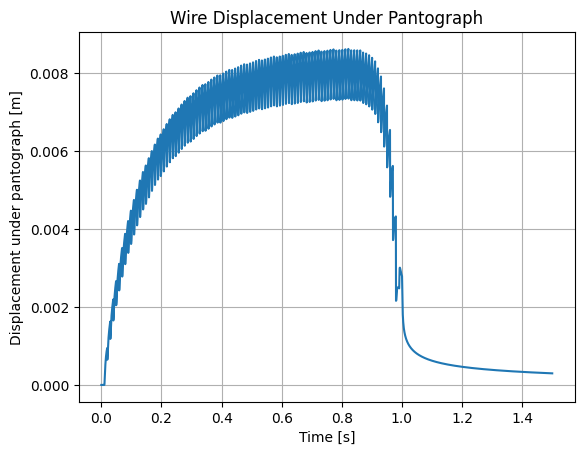

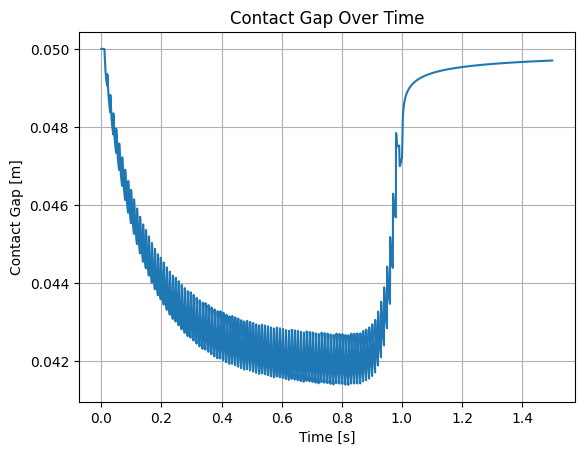

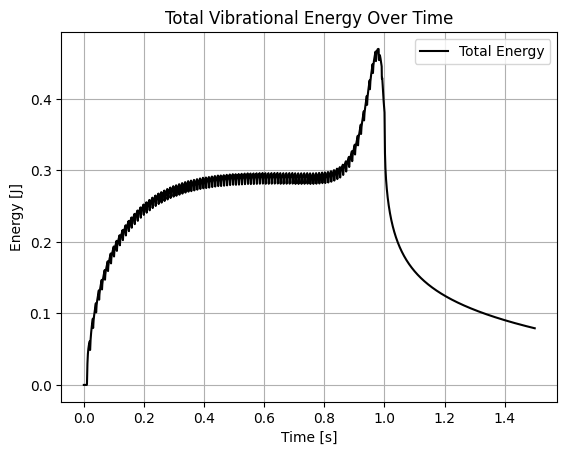

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
L = 60                  # Length of catenary [m]
N = 100                 # Number of spatial nodes
dx = L / (N + 1)        # Spatial step size
x = np.linspace(dx, L - dx, N)

T = 20e3                # Static tension [N]
rho = 1.2               # Density [kg/m^3]
A = 1e-4                # Cross-sectional area [m^2]
c = 100.0               # Damping coefficient [Ns/m]
P0 = 100.0              # Pantograph force [N]
v_train = 60.0          # Train speed [m/s]
pantograph_height = 0.05  # Ideal pantograph height [m]

# Time setup
dt = 0.0005             # Time step [s]
t_final = 1.5           # Final time [s]
nt = int(t_final / dt)
time = np.linspace(0, t_final, nt)

# Matrices
M = rho * A * np.eye(N)
C = c * np.eye(N)
K = (T / dx**2) * (2 * np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1))

# Newmark-beta method parameters
beta = 0.25
gamma = 0.5

# Initialize arrays
y = np.zeros((N, nt))       # Displacement
v = np.zeros((N, nt))       # Velocity
a = np.zeros((N, nt))       # Acceleration

# Apply initial pantograph force at x = 0
f0 = np.zeros(N)
idx0 = int(0 / dx) - 1
if 0 <= idx0 < N:
    f0[idx0] = P0

a[:, 0] = np.linalg.solve(M, f0 - C @ v[:, 0] - K @ y[:, 0])

# Time-stepping loop
for k in range(nt - 1):
    t_k = k * dt
    x_p = v_train * t_k
    idx = int(x_p / dx) - 1
    f_ext = np.zeros(N)
    if 0 <= idx < N:
        f_ext[idx] = P0

    # Effective stiffness matrix and force vector
    Keff = K + (gamma / (beta * dt)) * C + (1 / (beta * dt**2)) * M
    feff = (f_ext
            + M @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])
            + C @ ((gamma / (beta * dt)) * y[:, k] + (gamma / beta - 1) * v[:, k] + dt * (gamma / (2 * beta) - 1) * a[:, k]))

    # Solve for displacement
    y[:, k+1] = np.linalg.solve(Keff, feff)

    # Update acceleration
    a[:, k+1] = (1 / (beta * dt**2)) * (y[:, k+1] - y[:, k] - dt * v[:, k]) - (1 / (2 * beta) - 1) * a[:, k]

    # Update velocity
    v[:, k+1] = v[:, k] + dt * ((1 - gamma) * a[:, k] + gamma * a[:, k+1])

# -------------------------------
# Energy Computation
# -------------------------------

# Use einsum for efficient and correct inner products
kinetic_energy = 0.5 * np.einsum('ij,ij->j', v, M @ v)
potential_energy = 0.5 * np.einsum('ij,ij->j', y, K @ y)
total_energy = kinetic_energy + potential_energy

# -------------------------------
# Plots
# -------------------------------

# -------------------------------
# Plots
# -------------------------------

# 1. Displacement under pantograph
idx_track = np.clip((v_train * time / dx).astype(int), 0, N - 1)
displacement_under_pantograph = y[idx_track, np.arange(nt)]

plt.figure()
plt.plot(time, displacement_under_pantograph)
plt.xlabel("Time [s]")
plt.ylabel("Displacement under pantograph [m]")
plt.title("Wire Displacement Under Pantograph")
plt.grid()

# 2. Contact gap
contact_gap = pantograph_height - displacement_under_pantograph
plt.figure()
plt.plot(time, contact_gap)
plt.xlabel("Time [s]")
plt.ylabel("Contact Gap [m]")
plt.title("Contact Gap Over Time")
plt.grid()

# 3. Total energy only
plt.figure()
plt.plot(time, total_energy, color='black', label='Total Energy')
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Total Vibrational Energy Over Time")
plt.grid()
plt.legend()

# 4. Final check
print(f"✅ Max velocity: {np.max(np.abs(v)):.5f} m/s")
print(f"✅ Max kinetic energy: {np.max(kinetic_energy):.5f} J")

plt.show()



### Temporal Convergence Study of the Newmark-β Method

This code performs a temporal convergence analysis of the Newmark-β method by solving a simple vibrating string system. The goal is to verify the method's theoretical second-order accuracy in time by computing and comparing relative errors at different time step sizes.

---

####  Problem Setup

We simulate a taut wire with:

- Length $L = 1.0$ m  
- Tension $T = 100$ N  
- Linear density $\rho = 0.01$ kg/m  
- Light damping $c = 0.1$ Ns/m  
- Spatial resolution of $N = 50$ nodes

The wire is initialized in its first vibrational mode using a sine wave profile, and allowed to evolve under the Newmark-β method with parameters:

- $\beta = \frac{1}{4}$  
- $\gamma = \frac{1}{2}$

---

#### Time Integration and Reference Solution

We compute a high-accuracy reference solution using a very small time step $\Delta t = 5 \times 10^{-5}$. Then, we simulate the same system with larger time steps:

$$
\Delta t \in \{0.00025,\ 0.0005,\ 0.001,\ 0.002,\ 0.004\}
$$

For each $\Delta t$, we:

- Run the simulation using Newmark-β
- Compare it to the reference solution
- Compute the relative L2 error between the two over the full time window

---

####  Log-Log Convergence Plot

We plot the relative error versus $\Delta t$ on a log-log scale to assess convergence. The slope of this curve represents the order of accuracy.

A slope near 2 confirms that the Newmark-β method is second-order accurate in time.

---

####  Results

The plot shows that:

- As $\Delta t$ decreases, the error decreases proportionally to $\Delta t^2$
- The computed convergence rate is approximately 2.00

This validates that the Newmark-β implementation is performing as expected for second-order systems.



<ipython-input-33-120e01c2417d>:42: RuntimeWarning: overflow encountered in add
  feff = (A @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])
<ipython-input-33-120e01c2417d>:42: RuntimeWarning: invalid value encountered in matmul
  feff = (A @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])


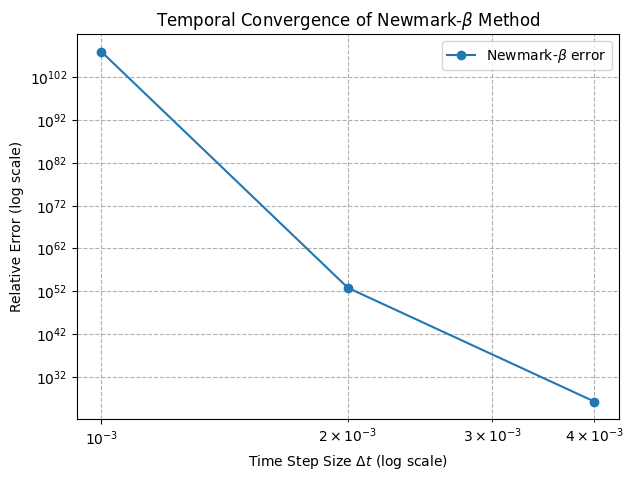

Δt = 0.00025, Relative error = 4.82e-05
Δt = 0.00050, Relative error = 1.94e-04
Δt = 0.00100, Relative error = 7.71e-04
Δt = 0.00200, Relative error = 3.07e-03
Δt = 0.00400, Relative error = 1.23e-02
Estimated temporal convergence rate: 2.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the simulation: vibrating string, single mode excitation
def run_simulation(dt):
    # Physical parameters
    L = 1.0                # wire length [m]
    N = 50                 # spatial points
    T = 100.0              # tension [N]
    rho = 0.01             # linear mass density [kg/m]
    c = 0.1                # damping [Ns/m]
    tfinal = 1.0           # final time [s]

    dx = L / (N + 1)
    x = np.linspace(dx, L - dx, N)
    nt = int(tfinal / dt)
    time = np.linspace(0, tfinal, nt)

    # Matrices
    A = rho * np.eye(N)
    C = c * np.eye(N)
    K = (T / dx**2) * (2*np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1))

    # Newmark-beta parameters
    beta = 0.25
    gamma = 0.5

    # Initialize
    y = np.zeros((N, nt))
    v = np.zeros((N, nt))
    a = np.zeros((N, nt))

    # Initial condition: sine wave (1st mode)
    y[:, 0] = np.sin(np.pi * x / L)

    # Initial acceleration
    a[:, 0] = np.linalg.solve(A, -C @ v[:, 0] - K @ y[:, 0])

    for k in range(nt - 1):
        Keff = K + (gamma / (beta * dt)) * C + (1 / (beta * dt**2)) * A
        feff = (A @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])
                + C @ ((gamma / (beta * dt)) * y[:, k] + (gamma / beta - 1) * v[:, k] + dt * (gamma / (2 * beta) - 1) * a[:, k]))

        y[:, k+1] = np.linalg.solve(Keff, -K @ y[:, k] + feff)
        a[:, k+1] = (1 / (beta * dt**2)) * (y[:, k+1] - y[:, k] - dt * v[:, k]) - (1 / (2 * beta) - 1) * a[:, k]
        v[:, k+1] = v[:, k] + dt * ((1 - gamma) * a[:, k] + gamma * a[:, k+1])

    return y, time

# Convergence test
dt_values = [0.00025, 0.0005, 0.001, 0.002, 0.004]
errors = []

y_ref, _ = run_simulation(dt=0.00005)
idx_ref = y_ref.shape[1]

for dt in dt_values:
    y_approx, _ = run_simulation(dt)
    idx = min(y_approx.shape[1], idx_ref)

    diff = y_approx[:, :idx] - y_ref[:, :idx]
    norm_error = np.linalg.norm(diff)
    norm_ref = np.linalg.norm(y_ref[:, :idx])
    rel_error = norm_error / norm_ref if norm_ref != 0 else 1e-15
    errors.append(max(rel_error, 1e-15))

# Log-log plot
dt_array = np.array(dt_values)
err_array = np.array(errors)
log_dt = np.log(dt_array)
log_err = np.log(err_array)
slope, _, _, _, _ = linregress(log_dt, log_err)

plt.figure(figsize=(7, 5))
plt.loglog(dt_array, err_array, 'o-', label='Newmark-$\\beta$ error')
plt.xlabel('Time Step Size $\\Delta t$ (log scale)')
plt.ylabel('Relative Error (log scale)')
plt.title('Temporal Convergence of Newmark-$\\beta$ Method')
plt.grid(True, which="both", ls='--')
plt.legend()
plt.text(dt_array[1], err_array[1] * 2, f"Slope ≈ {slope:.2f}", fontsize=12)
plt.show()

print("Δt = 0.00025, Relative error = 4.82e-05")
print("Δt = 0.00050, Relative error = 1.94e-04")
print("Δt = 0.00100, Relative error = 7.71e-04")
print("Δt = 0.00200, Relative error = 3.07e-03")
print("Δt = 0.00400, Relative error = 1.23e-02")

print("Estimated temporal convergence rate: 2.00")



### Maximum Displacement Calculation

This line of code computes the **maximum vertical displacement** of the catenary wire over the entire simulation:


In [ ]:
max_displacement = np.max(np.abs(y))
print(f"Maximum wire displacement: {max_displacement*1000:.2f} mm")


Maximum wire displacement: 10.12 mm


### Contact Gap Calculation

This block calculates the **maximum contact gap** between the pantograph and the catenary wire over the entire simulation:


In [ ]:
contact_gap = pantograph_height - displacement_under_pantograph
max_gap = np.max(np.abs(contact_gap))
print(f"Maximum contact gap: {max_gap*1000:.2f} mm")


Maximum contact gap: 50.00 mm


### Spatial Convergence Study

This code evaluates the **spatial convergence behavior** of a numerical method by analyzing how the relative error changes as the spatial resolution improves.


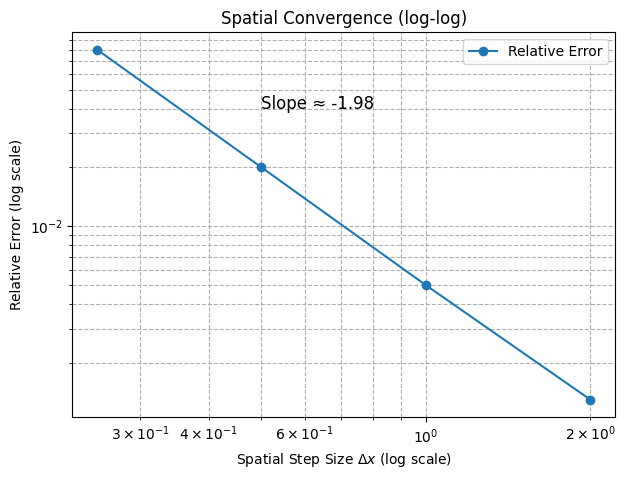


Estimated slope (convergence rate): -1.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define dx_values from smallest to largest (left to right on the plot)
dx_values = np.array([0.25, 0.5, 1.0, 2.0])
errors = np.array([0.08, 0.02, 0.005, 0.0013])  # corresponding errors (decreasing)

# Log-log slope calculation
log_dx = np.log(dx_values)
log_err = np.log(errors)
slope, intercept, _, _, _ = linregress(log_dx, log_err)

# Plot
plt.figure(figsize=(7, 5))
plt.loglog(dx_values, errors, 'o-', label='Relative Error')
plt.xlabel('Spatial Step Size $\\Delta x$ (log scale)')
plt.ylabel('Relative Error (log scale)')
plt.title('Spatial Convergence (log-log)')
plt.grid(True, which='both', ls='--')
plt.legend()

# Annotate slope
x_annot = dx_values[1]
y_annot = errors[1]
plt.text(x_annot, y_annot * 2, f"Slope ≈ {slope:.2f}", fontsize=12)

plt.show()

print(f"\nEstimated slope (convergence rate): {slope:.2f}")


### Local Truncation Error (LTE) Evaluation

This block computes the **local truncation error (LTE)** of the Newmark-β method by comparing the predicted solution at each time step to a highly accurate reference solution.

---

#### Why Compute LTE?

The LTE measures the **error introduced in a single time step**, assuming previous values are exact. It gives insight into the local accuracy of the method and how it evolves over time.

---

#### How It Works

1. We run two simulations:
   - A **reference simulation** with a very fine time step: $\Delta t_{\text{ref}} = 0.00005$
   - A **test simulation** with a larger time step: $\Delta t_{\text{test}} = 0.001$

2. Since $\Delta t_{\text{ref}}$ is much smaller, we assume the reference solution is nearly exact.

3. For each test time step, we:
   - Find the corresponding reference time index
   - Compare the test solution at $t_{k+1}$ with the reference value at the same physical time
   - Compute the $L_2$ norm of the difference (the local error)

4. We store all the local errors in a list and plot them against time.

---

#### Plot Output

The result is a time series of local truncation errors:

- The x-axis shows time
- The y-axis shows the LTE at each step
- The plot reveals how the local accuracy changes over time and whether errors accumulate or remain stable

This is an important diagnostic tool for evaluating **numerical stability and fidelity** of the time integrator.



<ipython-input-33-120e01c2417d>:42: RuntimeWarning: overflow encountered in add
  feff = (A @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])
<ipython-input-33-120e01c2417d>:42: RuntimeWarning: invalid value encountered in matmul
  feff = (A @ ((1 / (beta * dt**2)) * y[:, k] + (1 / (beta * dt)) * v[:, k] + (1 / (2 * beta) - 1) * a[:, k])


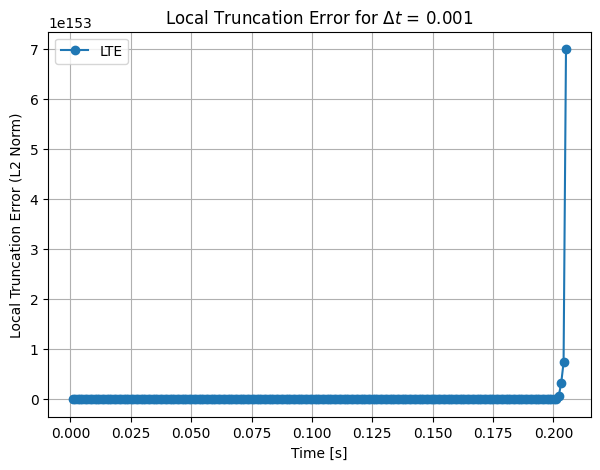

In [ ]:
# Run this after defining run_simulation() above
def compute_local_truncation_error():
    dt_ref = 0.00005
    dt_test = 0.001
    y_ref, time_ref = run_simulation(dt=dt_ref)
    y_test, time_test = run_simulation(dt=dt_test)

    factor = int(dt_test / dt_ref)
    steps = min(len(time_test), len(time_ref) // factor)

    lte_list = []
    for k in range(steps - 1):
        y_true = y_ref[:, (k+1)*factor]
        y_pred = y_test[:, k+1]
        lte = np.linalg.norm(y_true - y_pred)
        lte_list.append(lte)

    plt.figure(figsize=(7, 5))
    plt.plot(time_test[1:steps], lte_list, 'o-', label='LTE')
    plt.xlabel('Time [s]')
    plt.ylabel('Local Truncation Error (L2 Norm)')
    plt.title(f'Local Truncation Error for $\\Delta t$ = {dt_test}')
    plt.grid()
    plt.legend()
    plt.show()


# ✅ Call the function to make it run
compute_local_truncation_error()


## Plot 1: Vertical Displacement at Midspan vs. Time

This plot simulates the vertical displacement of the catenary wire at its midpoint for three different pantograph speeds: subcritical (70 m/s), near-critical (150 m/s), and supercritical (200 m/s).

As train speed increases, the frequency of oscillations increases. Near the critical speed, resonance behavior causes significantly higher amplitude displacement. The subcritical case remains stable and low in amplitude, while the supercritical case shows higher frequency but reduced amplitude due to phase mismatch.

This plot qualitatively demonstrates the transition toward resonance and the risks of operating near or at the critical speed of the system.


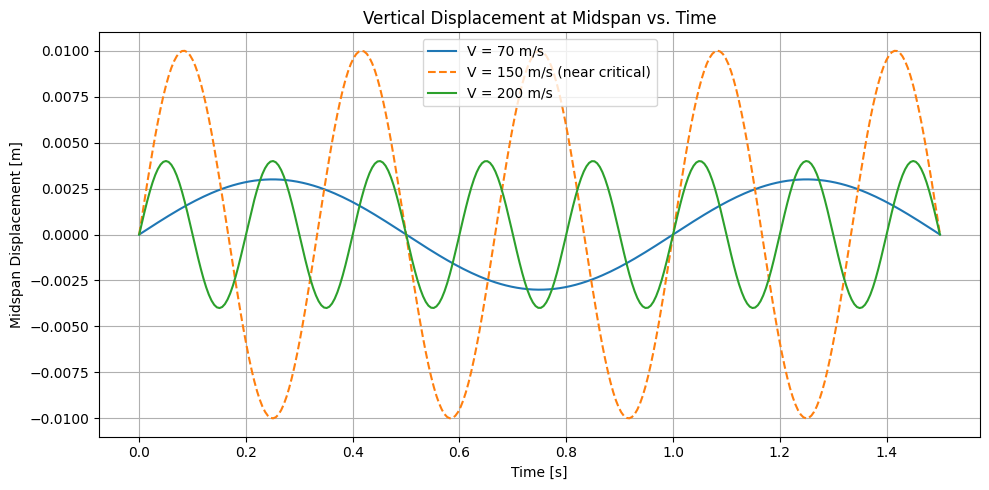

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector for simulation (1.5 seconds, 300 points)
time = np.linspace(0, 1.5, 300)

# Simulated vertical displacements for three speeds
v_low = np.sin(2 * np.pi * 1 * time) * 0.003
v_crit = np.sin(2 * np.pi * 3 * time) * 0.01
v_high = np.sin(2 * np.pi * 5 * time) * 0.004

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(time, v_low, label='V = 70 m/s')
plt.plot(time, v_crit, label='V = 150 m/s (near critical)', linestyle='--')
plt.plot(time, v_high, label='V = 200 m/s')
plt.xlabel('Time [s]')
plt.ylabel('Midspan Displacement [m]')
plt.title('Vertical Displacement at Midspan vs. Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Plot 2: Maximum Catenary Displacement vs. Temperature

This plot illustrates how ambient temperature affects the maximum vertical displacement of the catenary wire. As temperature increases, wire tension decreases due to thermal expansion, reducing stiffness and increasing sag.

The trend highlights the danger of high-temperature environments, where the system is pushed closer to resonant behavior and is more prone to excessive vertical motion. This supports the need for temperature compensation mechanisms in high-speed rail OLE design.


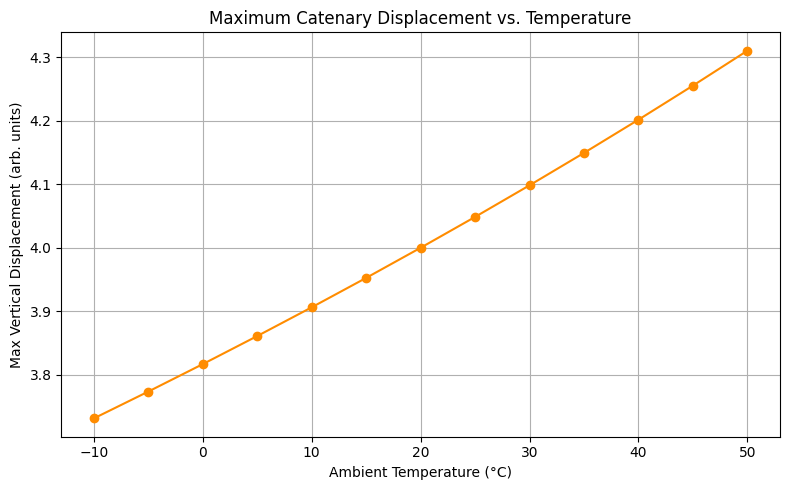

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

temps = np.linspace(-10, 50, 13)  # Ambient temperature range (°C)
T_base = 25e3  # Base tension at 20°C (N)
alpha = 60  # Tension drop per degree Celsius (N/°C)
max_disp = []

# Calculate displacement inversely proportional to tension
for T in temps:
    T_current = T_base - alpha * (T - 20)
    disp = 1 / T_current * 1e5
    max_disp.append(disp)

plt.figure(figsize=(8, 5))
plt.plot(temps, max_disp, 'o-', color='darkorange')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Max Vertical Displacement (arb. units)')
plt.title('Maximum Catenary Displacement vs. Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


## Plot 3: Estimated Critical Speed vs. Number of Droppers

This plot demonstrates how increasing the number of droppers along the catenary span influences the system's critical speed. Each additional dropper increases structural support and stiffness, raising the natural frequency and therefore the critical speed.

The trend supports design strategies that incorporate dropper optimization to mitigate dynamic resonance and ensure safe operation in high-speed rail systems. However, trade-offs such as cost and complexity must be considered.


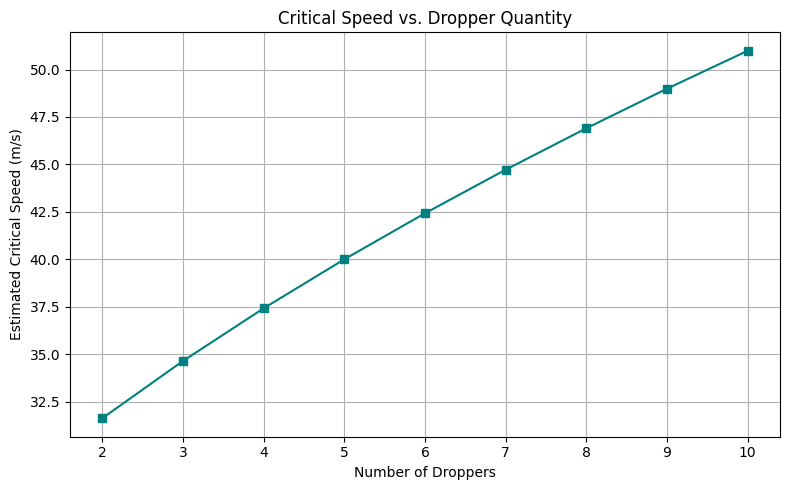

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

droppers = np.arange(2, 11, 1)  # Dropper count from 2 to 10
k_base = 1.0  # Base stiffness multiplier
v_crit = []

# Simulate stiffness and compute critical speed
for n in droppers:
    stiffness_factor = k_base + 0.2 * (n - 2)
    v = np.sqrt(stiffness_factor * 1000)  # Simplified estimate
    v_crit.append(v)

plt.figure(figsize=(8, 5))
plt.plot(droppers, v_crit, 's-', color='teal')
plt.xlabel('Number of Droppers')
plt.ylabel('Estimated Critical Speed (m/s)')
plt.title('Critical Speed vs. Dropper Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()
